# LSTM Camels-ESP

In [1]:
! pip install neuralhydrology

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.5/169.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 9.0 MB/s eta 0:00:00


In [2]:
import pickle
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
import torch
from neuralhydrology.evaluation import metrics
from neuralhydrology.nh_run import start_run, eval_run

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
/content/drive/MyDrive/GitHub/neuralhydrology/examples/08-ESP


In [ ]:
%cd /content/drive/MyDrive/TFM/models/91-Ebro/

### Entrenamiento

In [6]:
# by default we assume that you have at least one CUDA-capable NVIDIA GPU
if torch.cuda.is_available():
    start_run(config_file=Path("config.yml"))

# fall back to CPU-only mode
else:
    start_run(config_file=Path("config.yml"), gpu=-1)

# Validation:  63%|██████▎   | 36/57 [00:06<00:03,  5.25it/s]

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


# Validation:  74%|███████▎  | 42/57 [00:07<00:02,  7.19it/s]

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


# Validation:  74%|███████▎  | 42/57 [00:06<00:02,  6.61it/s]

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


# Validation:  77%|███████▋  | 44/57 [00:07<00:02,  5.00it/s]

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


# Validation:  53%|█████▎    | 30/57 [00:05<00:05,  5.28it/s]

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


# Validation:  63%|██████▎   | 36/57 [00:06<00:04,  5.17it/s]

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


# Validation:  65%|██████▍   | 37/57 [00:06<00:03,  5.01it/s]

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


# Validation:  68%|██████▊   | 39/57 [00:07<00:03,  5.61it/s]

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


# Validation:  74%|███████▎  | 42/57 [00:07<00:02,  7.16it/s]

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


# Validation:  81%|████████  | 46/57 [00:08<00:01,  6.07it/s]

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


# Validation:  84%|████████▍ | 48/57 [00:08<00:01,  5.52it/s]

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


# Validation:  91%|█████████ | 52/57 [00:09<00:00,  6.87it/s]

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


# Epoch 12:  26%|██▋       | 690/2612 [00:38<01:47, 17.94it/s, Loss: 0.0889]


RuntimeError: ignored

In [7]:
run_dir = Path("runs/Ebro_1808_")

### Validación


In [ ]:
with open(run_dir / "validation" / "model_epoch030" / "validation_results.p", "rb") as fp:
    val_results = pickle.load(fp)

# extract observations and simulations
for id, dct in val_results.items():
    qobs = dct['1D']['xr']['streamflow_obs']
    qsim = dct['1D']['xr']['streamflow_sim']

    fig, ax = plt.subplots(figsize=(12, 4))
    ax.plot(qobs['date'], qobs, label='obs')
    ax.plot(qsim['date'], qsim, label='sim')
    ax.set_ylabel("Discharge (mm/d)")
    ax.set_title(f"Test period - KGE {dct['1D']['KGE']:.3f}")
    ax.legend(frameon=False);

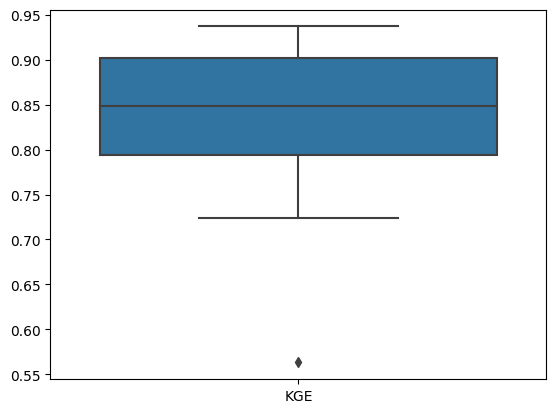

In [ ]:
# load validation metrics
val_metrics = pd.read_csv(run_dir / 'validation/model_epoch030/validation_metrics.csv', index_col='basin')

sns.boxplot(val_metrics);

### Evaluación

In [ ]:
# run_dir = Path("runs/Minho_1508_144839")
eval_run(run_dir=run_dir, period="test")

# Evaluation: 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]


In [ ]:
with open(run_dir / "test" / "model_epoch030" / "test_results.p", "rb") as fp:
    test_results = pickle.load(fp)

# extract observations and simulations
for id, dct in test_results.items():
    qobs = dct['1D']['xr']['streamflow_obs']
    qsim = dct['1D']['xr']['streamflow_sim']

    fig, ax = plt.subplots(figsize=(12, 4))
    ax.plot(qobs['date'], qobs, label='obs')
    ax.plot(qsim['date'], qsim, label='sim')
    ax.set_ylabel("Discharge (mm/d)")
    ax.set_title(f"Test period - KGE {dct['1D']['KGE']:.3f}")
    ax.legend(frameon=False);

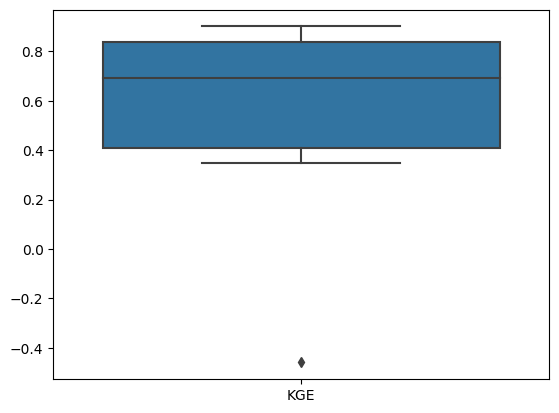

In [ ]:
# load validation metrics
test_metrics = pd.read_csv(run_dir / 'test/model_epoch030/test_metrics.csv', index_col='basin')

sns.boxplot(test_metrics);

Next, we are going to compute all metrics that are implemented in the NeuralHydrology package. You will find additional hydrological signatures implemented in `neuralhydrology.evaluation.signatures`.

In [ ]:
values = metrics.calculate_all_metrics(qobs.isel(time_step=-1), qsim.isel(time_step=-1))
for key, val in values.items():
    print(f"{key}: {val:.3f}")

NSE: 0.757
MSE: 69.038
RMSE: 8.309
KGE: 0.648
Alpha-NSE: 0.677
Beta-KGE: 0.901
Beta-NSE: -0.062
Pearson-r: 0.901
FHV: -31.473
FMS: -30.699
FLV: -1818.495
Peak-Timing: 0.500
Peak-MAPE: 48.958
